# Salz et al. (2016)
https://ui.adsabs.harvard.edu/abs/2016A%26A...586A..75S/abstract

Profiles extracted using a plot digitizer

In [11]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim

import matplotlib.pyplot as plt
import numpy as np

Atmosphere Composition
  Species:   HI,        HeI
  Mass frac: 8.00e-01, 2.00e-01



<Figure size 1500x1000 with 0 Axes>

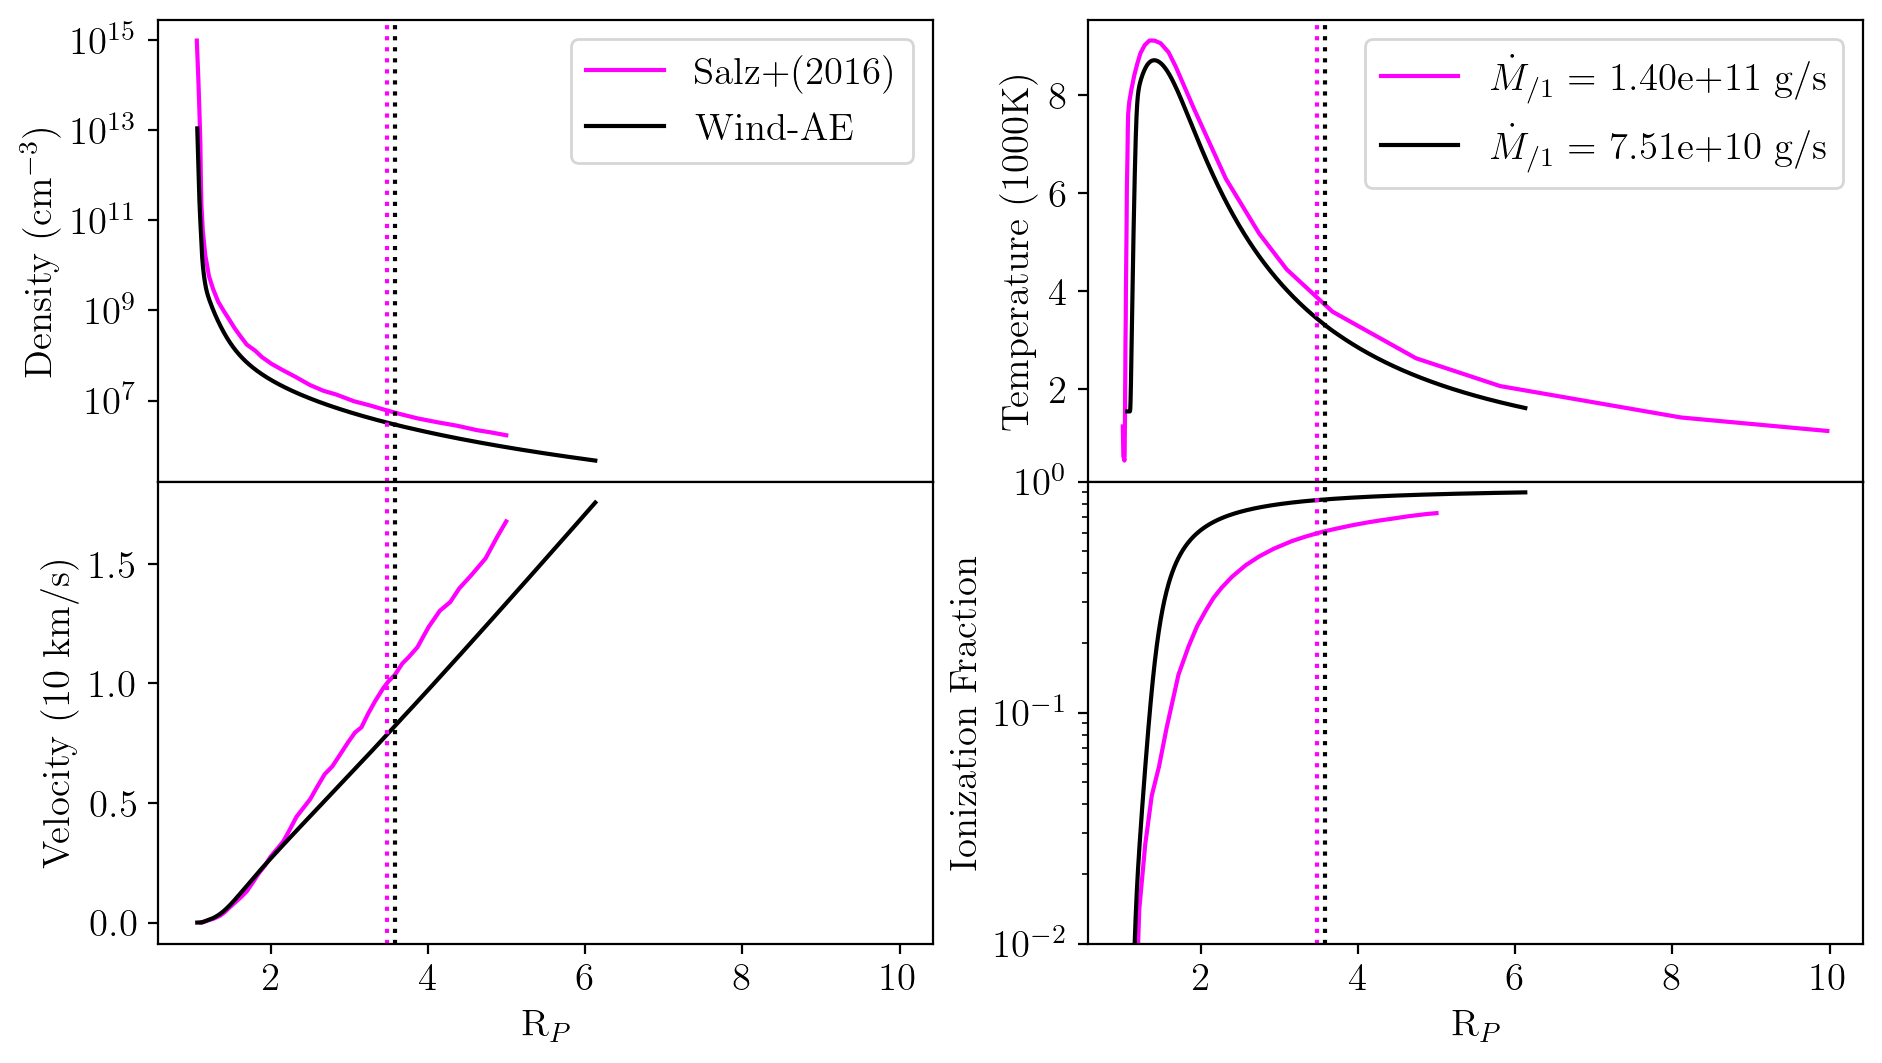

In [ ]:
sim=wind_sim()
path = 'data/'
sim.load_planet(path+'TCPI/HD209_TCPI.csv')
mdot = 1.4e11
Rsp = 3.468
# sim.load_planet('../relaxed-wind_good/saves/for_paper/Kubyshkina/GJ1214b_13.6-2000eV_H-He_solar.csv')
r = sim.windsoln.soln_norm['r']
plt.figure(figsize=[15,10])
kub = 'c'
tc='magenta'

fig, ax = plt.subplots(2,2,sharex=True,figsize=[11,6])
fig.subplots_adjust(hspace=0)

# ax[0,0] = plt.subplot(221)
r_rho,rho = np.genfromtxt(path+'TCPI/density.csv',delimiter=',',
                      skip_header=1).T #km/s #km/s
ax[0,0].plot(r_rho,rho,label='Salz+(2016)',c=tc)
ax[0,0].plot(r,sim.windsoln.soln['n_tot'],c='k',label='Wind-AE')
ax[0,0].axvline(sim.windsoln.R_sp,c='k',ls=':')
ax[0,0].axvline(Rsp,c=tc,ls=':')
ax[0,0].set_ylabel('Density (cm$^{-3}$)')
ax[0,0].set_xlabel(r'R$_P$')
ax[0,0].set_yscale('log')
ax[0,0].legend()

# plt.subplot(2,2,2)
# ax[1,0] = plt.subplot(222)
r_T,T = np.genfromtxt(path+'TCPI/temperature2.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[0,1].plot(r_T,T,label=r'$\dot{M}_{/1}$ = %.2e g/s'%mdot,c=tc)
ax[0,1].plot(r,sim.windsoln.soln['T']/1000,c='k',label=r'$\dot{M}_{/1}$ = %.2e g/s'%(sim.windsoln.Mdot*3))
ax[0,1].axvline(sim.windsoln.R_sp,c='k',ls=':')
ax[0,1].axvline(Rsp,c=tc,ls=':')
ax[0,1].set_ylabel('Temperature (1000K)')
ax[0,1].set_xlabel(r'R$_P$')
ax[0,1].legend()
# plt.show()

# ax[0,1] = plt.subplot(223,sharex=ax[0,0])
r_v,v = np.genfromtxt(path+'TCPI/velocity.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[1,0].plot(r_v,v/10,c=tc)
ax[1,0].plot(r,sim.windsoln.soln['v']/1e5/10,c='k')
ax[1,0].axvline(sim.windsoln.R_sp,c='k',ls=':')
ax[1,0].axvline(Rsp,c=tc,ls=':')
ax[1,0].set_ylabel('Velocity (10 km/s)')
ax[1,0].set_xlabel(r'R$_P$')
# plt.show()

# ax[1,1] = plt.subplot(224,sharex=ax[1,0])
# plt.subplot(2,2,4)
r_ion,ion = np.genfromtxt(path+'TCPI/ion_frac.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[1,1].plot(r_ion,ion,c=tc)
ionfrac = (sim.windsoln.soln['n_HII'])/sim.windsoln.soln['n_tot']
ax[1,1].plot(r,ionfrac,c='k')
ax[1,1].axvline(sim.windsoln.R_sp,c='k',ls=':')
ax[1,1].axvline(Rsp,c=tc,ls=':')
ax[1,1].set_ylabel('Ionization Fraction')
ax[1,1].set_xlabel(r'R$_P$')
ax[1,1].set_ylim(1e-2,1)
ax[1,1].set_yticks([0.01,0.1])
ax[1,1].set_yticklabels(['0.01','0.1'])
ax[1,1].set_yscale('log')
plt.show()